<a href="https://colab.research.google.com/github/Tridude5/ClimateRiskCoach/blob/main/Climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MScFE Capstone Project**
## Student Group: **11191**

### Members:
1. **Miklos Lammel**
2. **Jack Slavinskas**
3. **Cathal de Lacy**

## **Install and then import python packages**

In [1]:
# installing the required libraries
!pip install fredapi

# importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import yfinance as yf

import requests
import seaborn as sns
import json
from statsmodels.graphics.tsaplots import plot_acf

from datetime import date

import warnings
warnings.filterwarnings('ignore')

## **Data import**
Import, structure and graph the climate related indicator variable



- ESG Index (Environmental, Social, Governance): Monthly index data, can be sourced from providers like Indxx.com which is a paid, proprietary solution. As a proxy we can use ETFs. It captures corporate environmental and social risk management and sustainability practices.
- CPU Index (Climate Policy Uncertainty): Monthly data, available from the policyuncertainty.com website. Measures unpredictability in government climate-related actions and regulation.
- TRI (Transition Risk Index): Daily index, tracks risks from regulatory change, technology shifts, and market transformation related to moving toward a low-carbon economy. Data available from policyuncertainty.com and referenced datasets.
- PRI (Physical Risk Index): Daily index, measures vulnerability to extreme weather events and long-term physical changes (rising temperature, sea level, droughts, hurricanes, etc.). Also found on policyuncertainty.com and climate risk data repositories such as Guo et al. 2024.
- EPU Index (Economic Policy Uncertainty): Monthly data, standard financial uncertainty measure, available from policyuncertainty.com.



The ESG indices are usually proprietary and paid. Indxx.com has a nice set of ESG indices which was used by Maria Ghani in her work "Forecasting Climate-Sensitive Industries' Volatility"

Possible ESG indices / proxies accessible via yfinance

These aren't “ESG index series” per se, but ETFs whose performance roughly tracks ESG/ESG-screened equity portfolios:

ESGV — Vanguard ESG U.S. Stock ETF (US)
Yahoo Finance

ESGU — iShares ESG Aware MSCI USA ETF
Yahoo Finance

ESGD — iShares ESG Aware MSCI EAFE ETF
Yahoo Finance

SUSA — iShares ESG Optimized MSCI USA ETF
Yahoo Finance

USXF — iShares ESG Advanced MSCI USA ETF
Yahoo Finance

EEWD.L — iShares MSCI World ESG Enhanced CTB UCITS ETF (in London listing)
Yahoo Finance

These ETFs can give a time series of returns or price levels that approximate ESG-indexed performance in their respective universes.

Additionally, via yfinance, tickers sometimes have a .sustainability attribute containing ESG/risk scores (for individual companies)

# Other possible related dataseries

### **Get geopolitcal data (GPR, EUI)**

Start date: 1985-01-01 00:00:00
End date: 2025-06-01 00:00:00


,GPR
month,
1985-01-01,102.173378
1985-02-01,117.102020
1985-03-01,124.778152
1985-04-01,87.929001
1985-05-01,103.262848


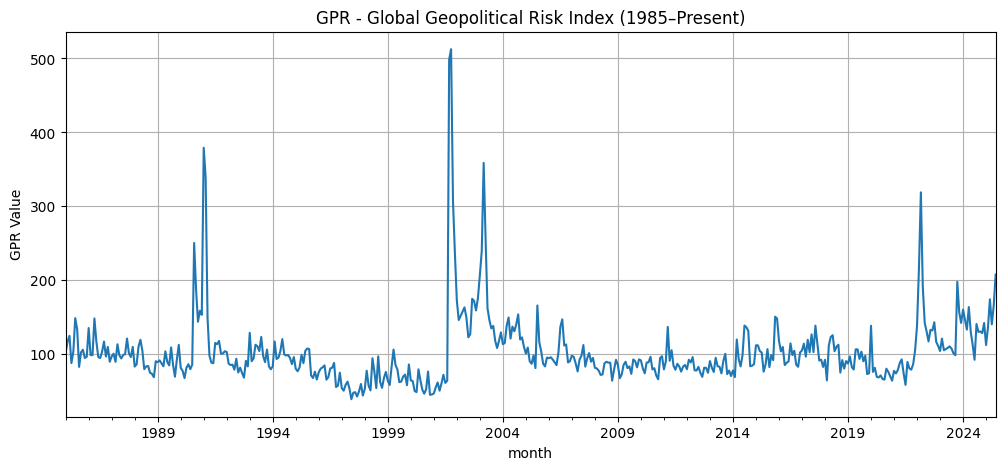

In [ ]:
# getting Geopolitical Risk Index - GPR (1985 - 2025)

# downloading the dataset
url = "https://www.matteoiacoviello.com/gpr_files/data_gpr_export.xls"
df = pd.read_excel(url) # top row is month and GPR
df['month'] = pd.to_datetime(df['month'], format='%d/%m/%Y')
df.set_index('month', inplace=True)
gpr = df[['GPR']]
gpr = gpr[gpr.index >= '1985-01-01']

date_from = gpr.first_valid_index()
date_to = gpr.last_valid_index()
print("Start date:", date_from)
print("End date:", date_to)
display(gpr.head())

# plotting the GPR series
gpr.plot(title='GPR - Global Geopolitical Risk Index (1985–Present)', figsize=(12, 5), legend=False)
plt.ylabel('GPR Value')
plt.grid(True)
plt.show()

Start date: 1996-01-01
End date: 2023-11-01


,Energy_Uncertainty_Index
Date,
1996-01-01,0.358232
1996-02-01,0.373172
1996-03-01,0.203098
1996-04-01,0.317945
1996-05-01,0.711228


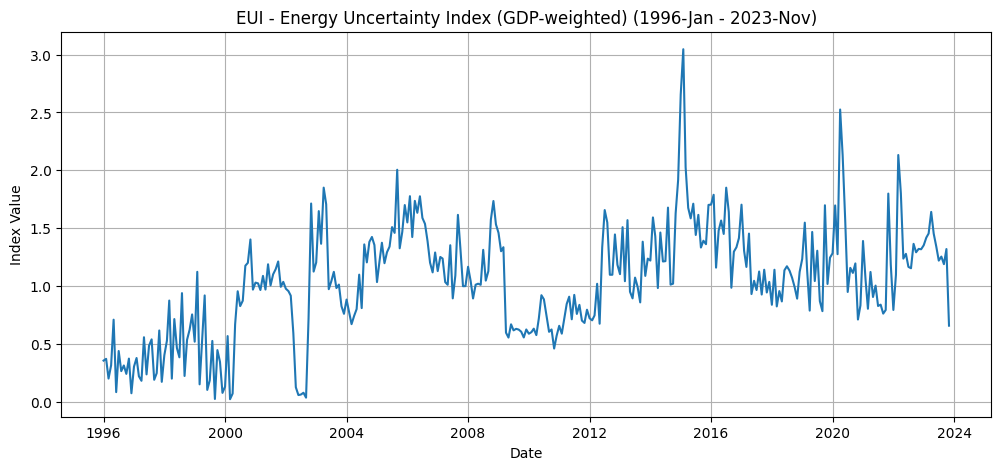

In [ ]:
# getting Energy Uncertainty Risk Index - EUI (1996-2023 monthly data)


# downloading the dataset (excel)
url = "https://www.policyuncertainty.com/media/Energy-Related%20Uncertainty%20Indexes.xlsx"
sheet_name = "Global Average EUI Indexes"

df = pd.read_excel(url, sheet_name=sheet_name, header=2, converters={'Date': str})
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%d-%m %H:%M:%S', errors='coerce')
df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)

# extracting the energy index
energy_index = df[['global_EUI_GDP_weighted']]
energy_index.rename(columns={'global_EUI_GDP_weighted': 'Energy_Uncertainty_Index'}, inplace=True)

# perid of the downloaded dataset
date_from = energy_index.first_valid_index()
date_to = energy_index.last_valid_index()
print("Start date:", date_from)
print("End date:", date_to)
display(energy_index.head())

# plotting the EUI series
energy_index.plot(title=f"EUI - Energy Uncertainty Index (GDP-weighted) ({date_from.strftime('%Y-%b')} - {date_to.strftime('%Y-%b')})", figsize=(12, 5), legend=False)
plt.ylabel('Index Value')
plt.grid(True)
plt.show()

### **Get FRED data (CPI, GDP)**

CPI (Consumer Price Index)


,US CPI
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


GDP (Gross Domestic Product)


,US GDP Growth Rate
1947-04-01,-1.0
1947-07-01,-0.8
1947-10-01,6.4
1948-01-01,6.2
1948-04-01,6.8


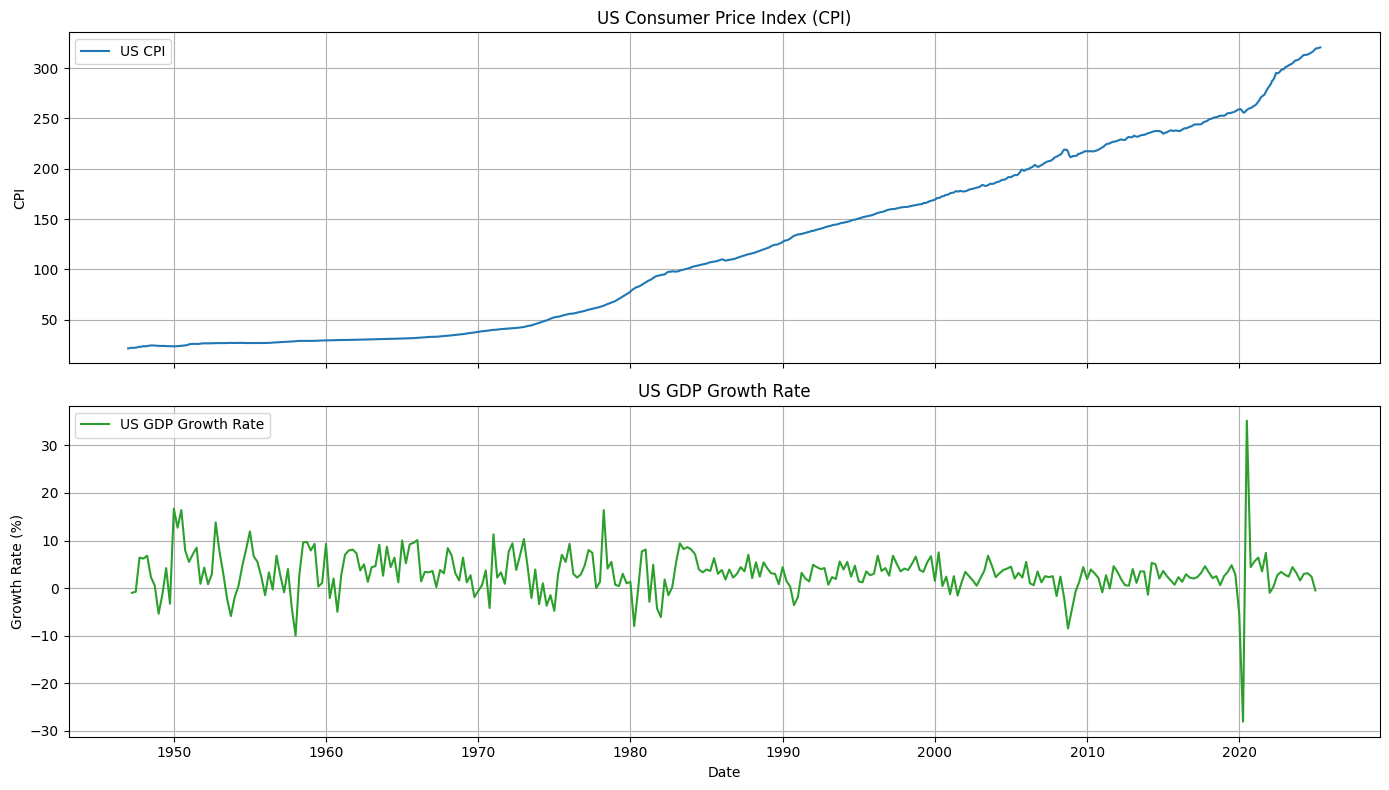

In [ ]:
FRED_API_KEY = '1eca31140fb3700173f5c8b43fecbf97'
fred = Fred(api_key=FRED_API_KEY)

# retrieving US CPI (Consumer Price Index) and US GDP (Gross Domestic Product) data
cpi = fred.get_series('CPIAUCSL')
gdp = fred.get_series('A191RL1Q225SBEA')
cpi.name = 'US CPI'
gdp.name = 'US GDP Growth Rate'

print("CPI (Consumer Price Index)")
display(cpi.head())

print("GDP (Gross Domestic Product)")
display(gdp.head())

# plotting US CPI and GDP series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

ax1.plot(cpi, label=cpi.name, color='tab:blue')
ax1.set_title('US Consumer Price Index (CPI)')
ax1.set_ylabel('CPI')
ax1.grid(True)
ax1.legend()

ax2.plot(gdp, label=gdp.name, color='tab:green')
ax2.set_title('US GDP Growth Rate')
ax2.set_xlabel('Date')
ax2.set_ylabel('Growth Rate (%)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

### **Get VIX index**

,VIX_Close
Date,
1996-01-02,12.19
1996-01-03,12.10
1996-01-04,13.78
1996-01-05,13.58
1996-01-08,13.11


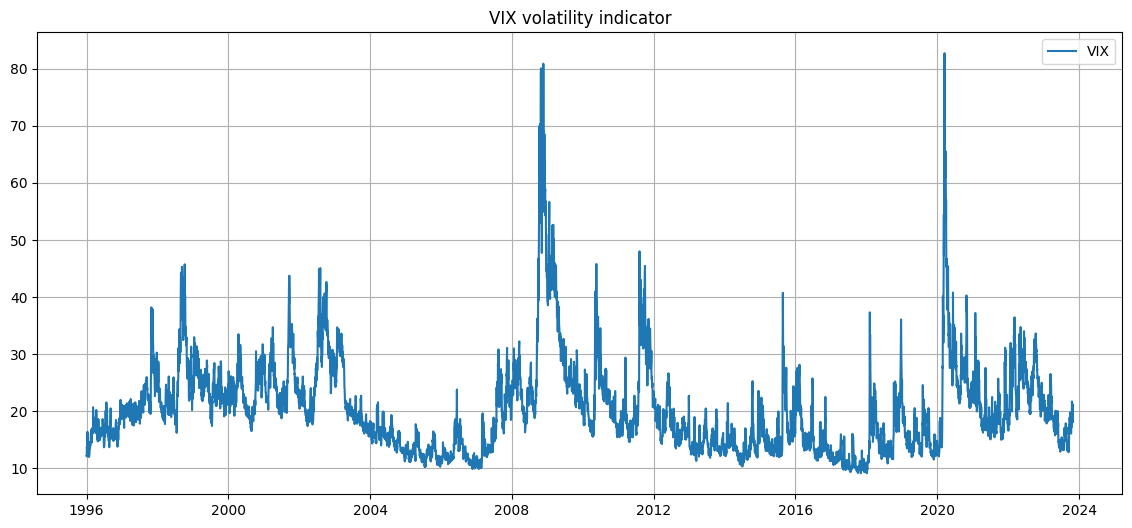

In [ ]:
# downloading VIX index from Yahoo finance
vix = yf.download('^VIX', start='1996-01-01', end='2023-11-01', progress=False, auto_adjust = True)
vix = vix[('Close', '^VIX')].rename('VIX_Close').to_frame()
display(vix.head())

# plotting the VIX series
plt.figure(figsize=(14, 6))
plt.title('VIX volatility indicator')
plt.plot(vix['VIX_Close'], label='VIX')
plt.legend()
plt.grid(True)
plt.show()

### **Get US Dollar Index (DXY)**

,DXY_Close
Date,
1996-01-01,84.760002
1996-01-02,84.690002
1996-01-03,85.110001
1996-01-04,85.220001
1996-01-05,85.059998


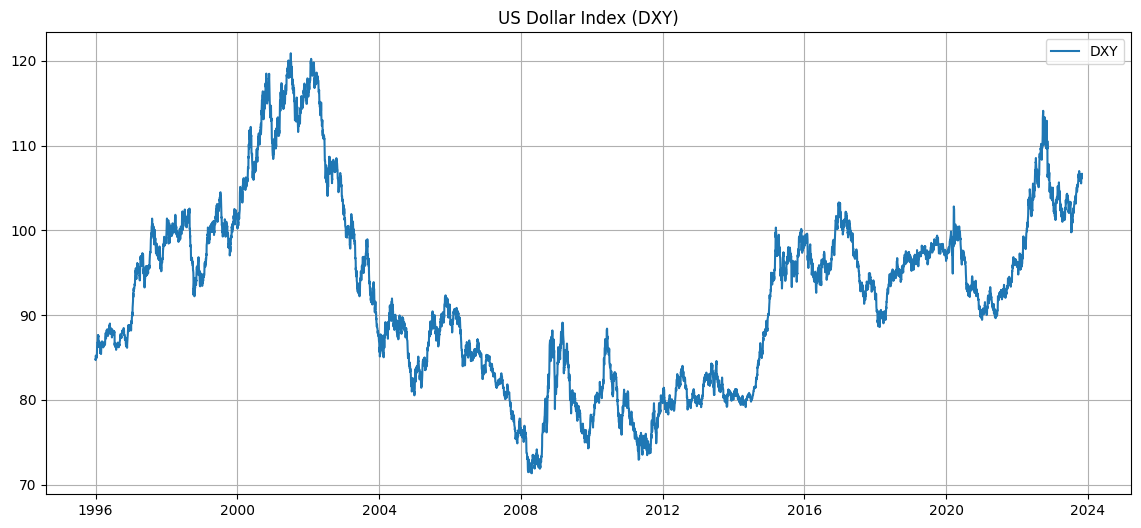

In [ ]:
# downloading DXY (US Dollar Index) from Yahoo finance
dxy = yf.download('DX-Y.NYB', start='1996-01-01', end='2023-11-01', progress=False, auto_adjust=True)
dxy = dxy[('Close', 'DX-Y.NYB')].rename('DXY_Close').to_frame()
display(dxy.head())

# plotting the DXY series
plt.figure(figsize=(14, 6))
plt.title('US Dollar Index (DXY)')
plt.plot(dxy['DXY_Close'], label='DXY')
plt.legend()
plt.grid(True)
plt.show()


Refinery Utilization Rate (FRED)
Start date: 1991-07-01 00:00:00
End date: 2025-05-01 00:00:00


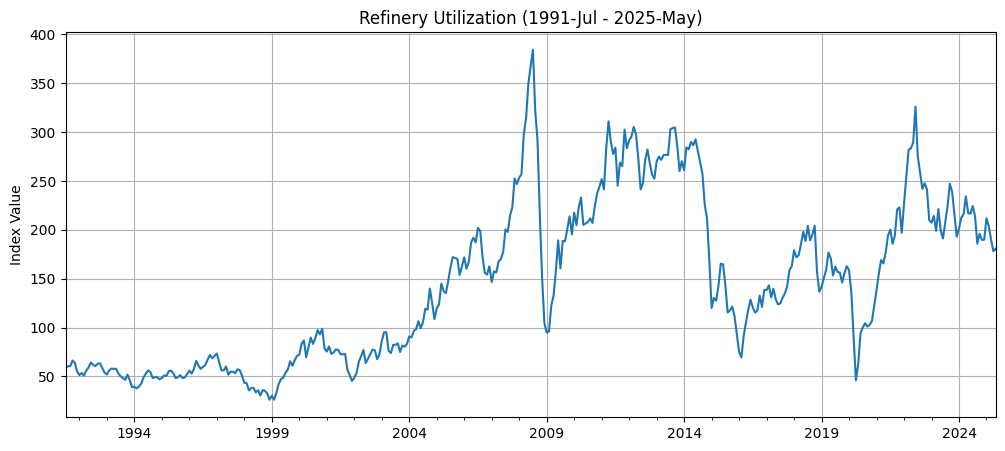

In [ ]:
FRED_API_KEY = '1eca31140fb3700173f5c8b43fecbf97'
fred = Fred(api_key=FRED_API_KEY)

rur = fred.get_series('WPU056101')
rur.name = 'Refinery Utilization rate'
print("Refinery Utilization Rate (FRED)")

# perid of the downloaded dataset
date_from = rur.first_valid_index()
date_to = rur.last_valid_index()
print("Start date:", date_from)
print("End date:", date_to)

# plotting the RUR series
rur.plot(title=f"Refinery Utilization ({date_from.strftime('%Y-%b')} - {date_to.strftime('%Y-%b')})", figsize=(12, 5), legend=False)
plt.ylabel('Index Value')
plt.grid(True)
plt.show()